In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [50]:
train.shape

(58645, 13)

In [51]:
test.shape

(39098, 12)

In [52]:
train.sample(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
36047,36047,29,110000,MORTGAGE,13.0,MEDICAL,A,10000,6.03,0.09,N,10,0
50153,50153,29,60000,RENT,4.0,VENTURE,B,10000,11.14,0.17,N,9,0
20873,20873,28,51000,MORTGAGE,3.0,HOMEIMPROVEMENT,A,2000,8.49,0.04,N,10,0
35836,35836,27,26400,MORTGAGE,4.0,EDUCATION,B,10000,10.25,0.38,N,10,0
34469,34469,24,47000,MORTGAGE,7.0,VENTURE,B,6000,11.71,0.13,N,4,0


In [53]:
test.sample(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30672,89317,22,54000,RENT,5.0,VENTURE,B,12000,10.99,0.22,N,2
4587,63232,24,53004,RENT,8.0,PERSONAL,B,20000,11.48,0.38,N,4
11208,69853,25,37980,RENT,8.0,MEDICAL,B,3500,12.21,0.09,N,2
22134,80779,23,24000,OWN,7.0,EDUCATION,C,6000,14.72,0.25,Y,4
25344,83989,25,60000,RENT,9.0,HOMEIMPROVEMENT,B,7200,10.74,0.12,N,4


In [54]:
id = test.id

In [55]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [56]:
train.duplicated().sum()

0

In [57]:
train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [142]:
train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [143]:
test.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [59]:
cat_cols = []
for col in train.columns:
    if train[col].dtype == 'object':
        cat_cols.append(col)

In [60]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [61]:
num_cols = []
for col in train.columns:
    if train[col].dtype != 'object' and col != 'loan_status':
        num_cols.append(col)

In [62]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

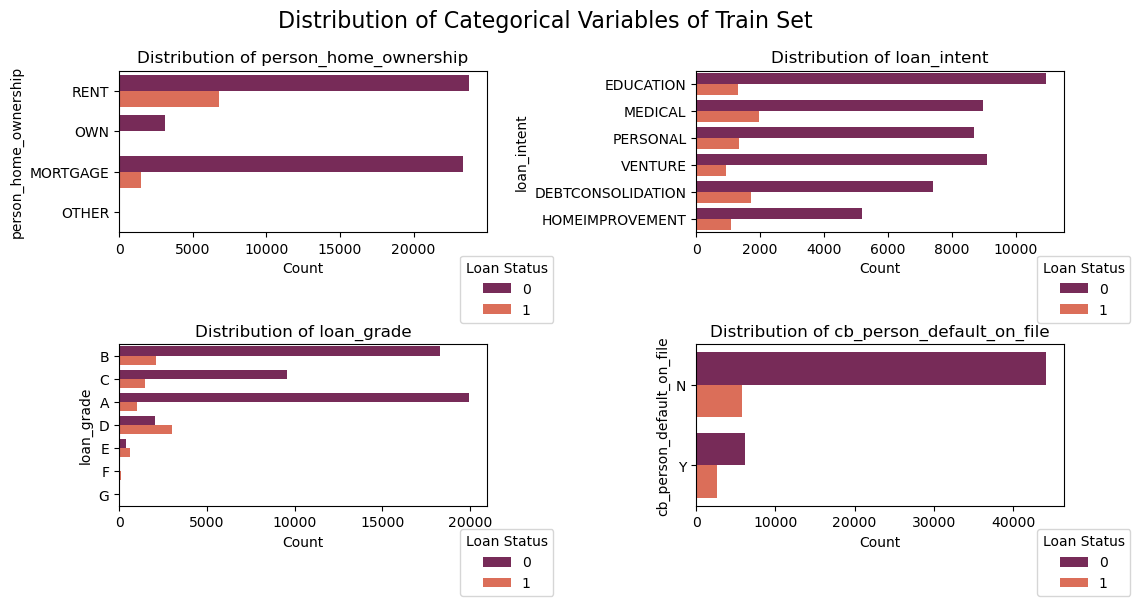

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Distribution of Categorical Variables of Train Set', fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9, bottom=0.8, left=0.8, right=0.9)

for idx, col in enumerate(cat_cols):
    row = idx // 2
    col_idx = idx % 2
    
    sns.countplot(data=train, y=col, palette='rocket', hue='loan_status', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel('Count')
    axes[row, col_idx].set_ylabel(col)
    axes[row, col_idx].legend(loc='upper right', bbox_to_anchor=(1.2, -0.1), title='Loan Status')
        
plt.tight_layout()
plt.show()

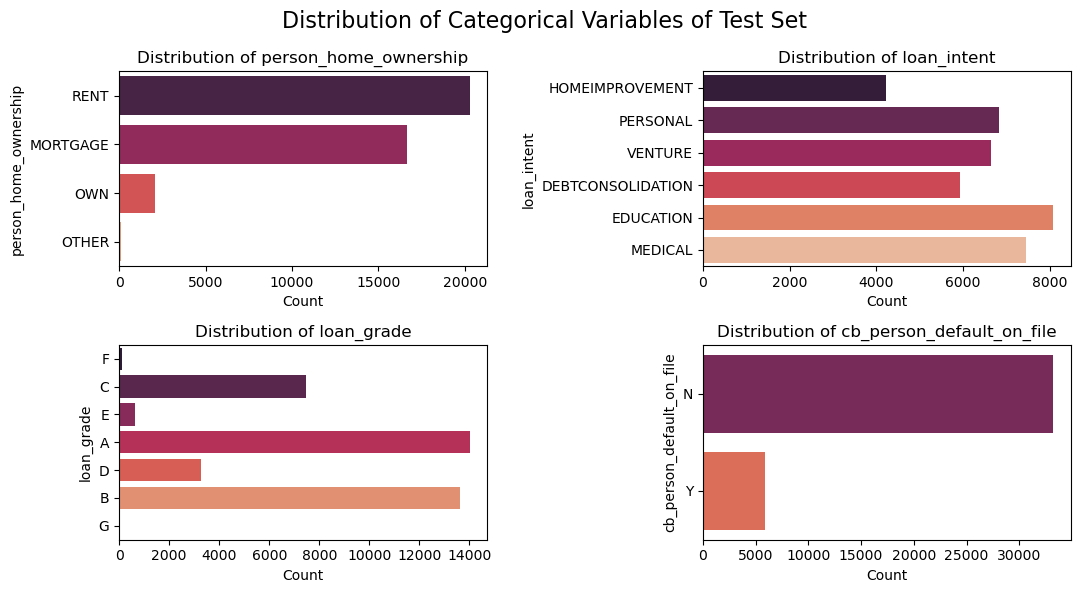

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Distribution of Categorical Variables of Test Set', fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9, bottom=0.8, left=0.8, right=0.9)

for idx, col in enumerate(cat_cols):
    row = idx // 2
    col_idx = idx % 2
    
    sns.countplot(data=test, y=col, palette='rocket', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel('Count')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

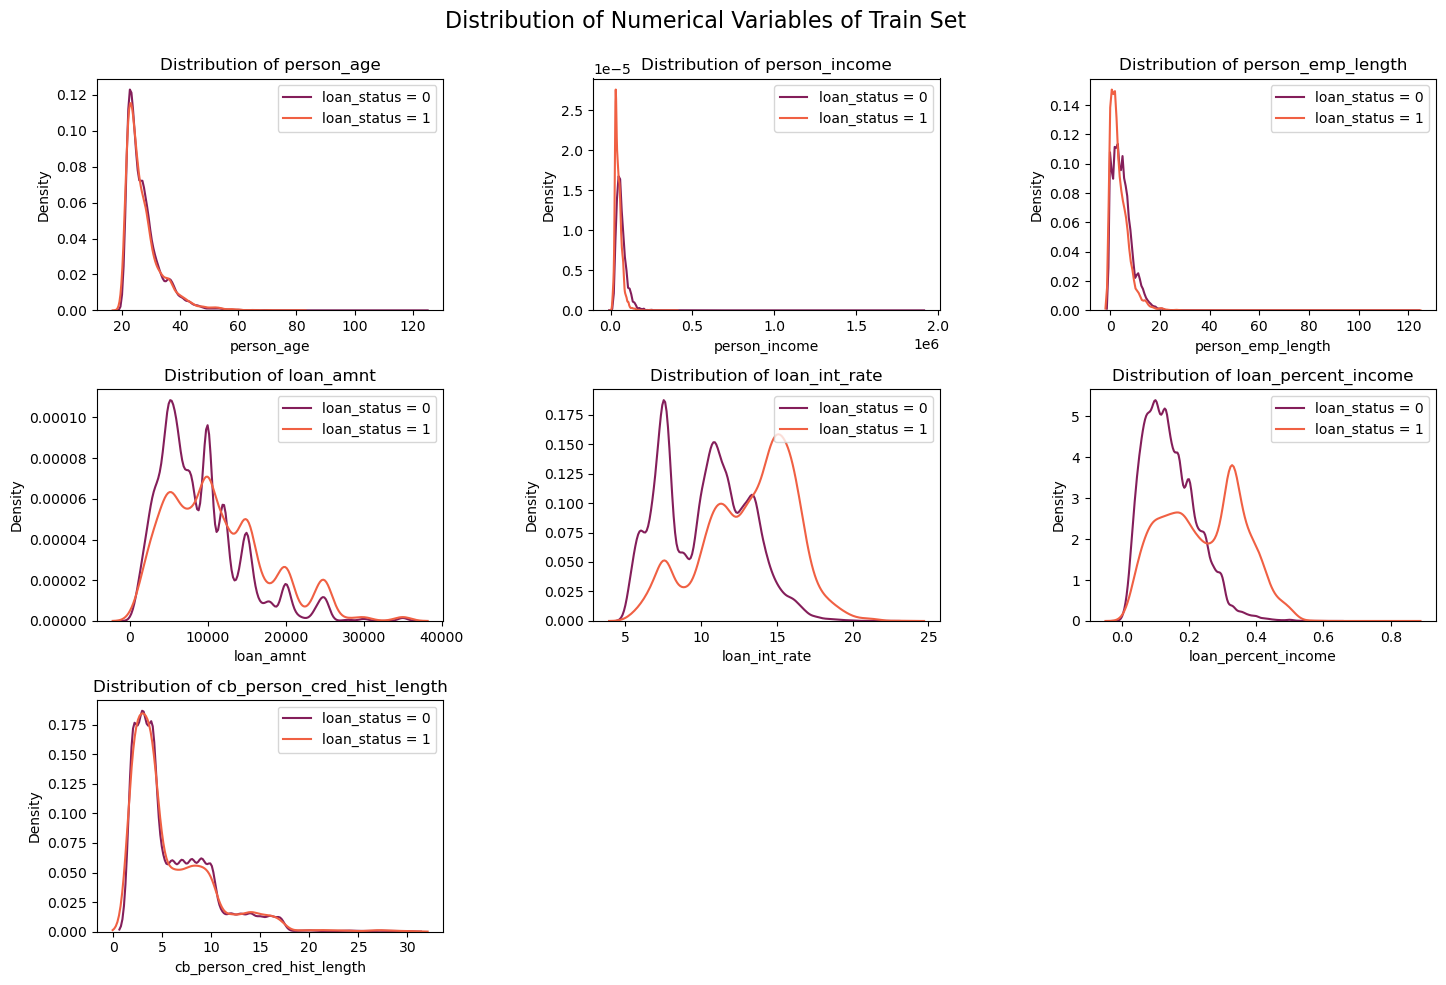

In [174]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
fig.suptitle('Distribution of Numerical Variables of Train Set', fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9, bottom=0.8, left=0.8, right=0.9)

palette = sns.color_palette("rocket", 2)  

for idx, col in enumerate(num_cols):
    row = idx // 3
    col_idx = idx % 3
    
    sns.kdeplot(train[train['loan_status'] == 0][col], label='loan_status = 0', shade=False, color=palette[0], ax=axes[row, col_idx])
    sns.kdeplot(train[train['loan_status'] == 1][col], label='loan_status = 1', shade=False, color=palette[1], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    
    axes[row, col_idx].legend(loc='upper right')

for i in range(len(num_cols), 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


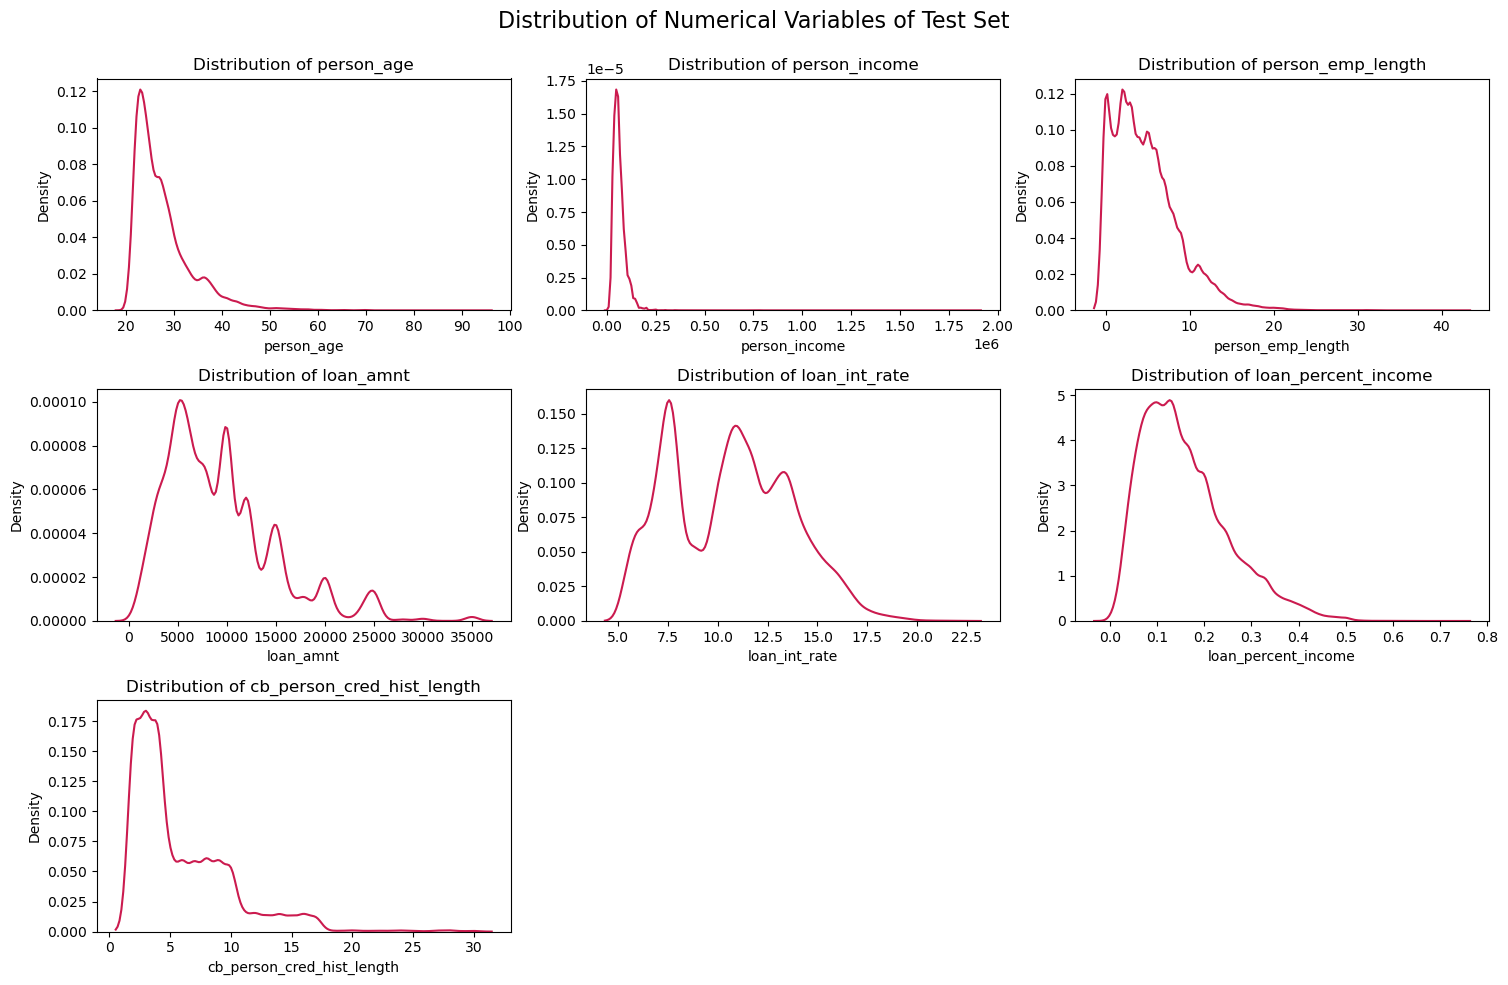

In [176]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
fig.suptitle('Distribution of Numerical Variables of Test Set', fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9, bottom=0.8, left=0.8, right=0.9)

palette = sns.color_palette("rocket", 1)  

for idx, col in enumerate(num_cols):
    row = idx // 3
    col_idx = idx % 3
    
    sns.kdeplot(test[col], shade=False, color=palette[0], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    
for i in range(len(num_cols), 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

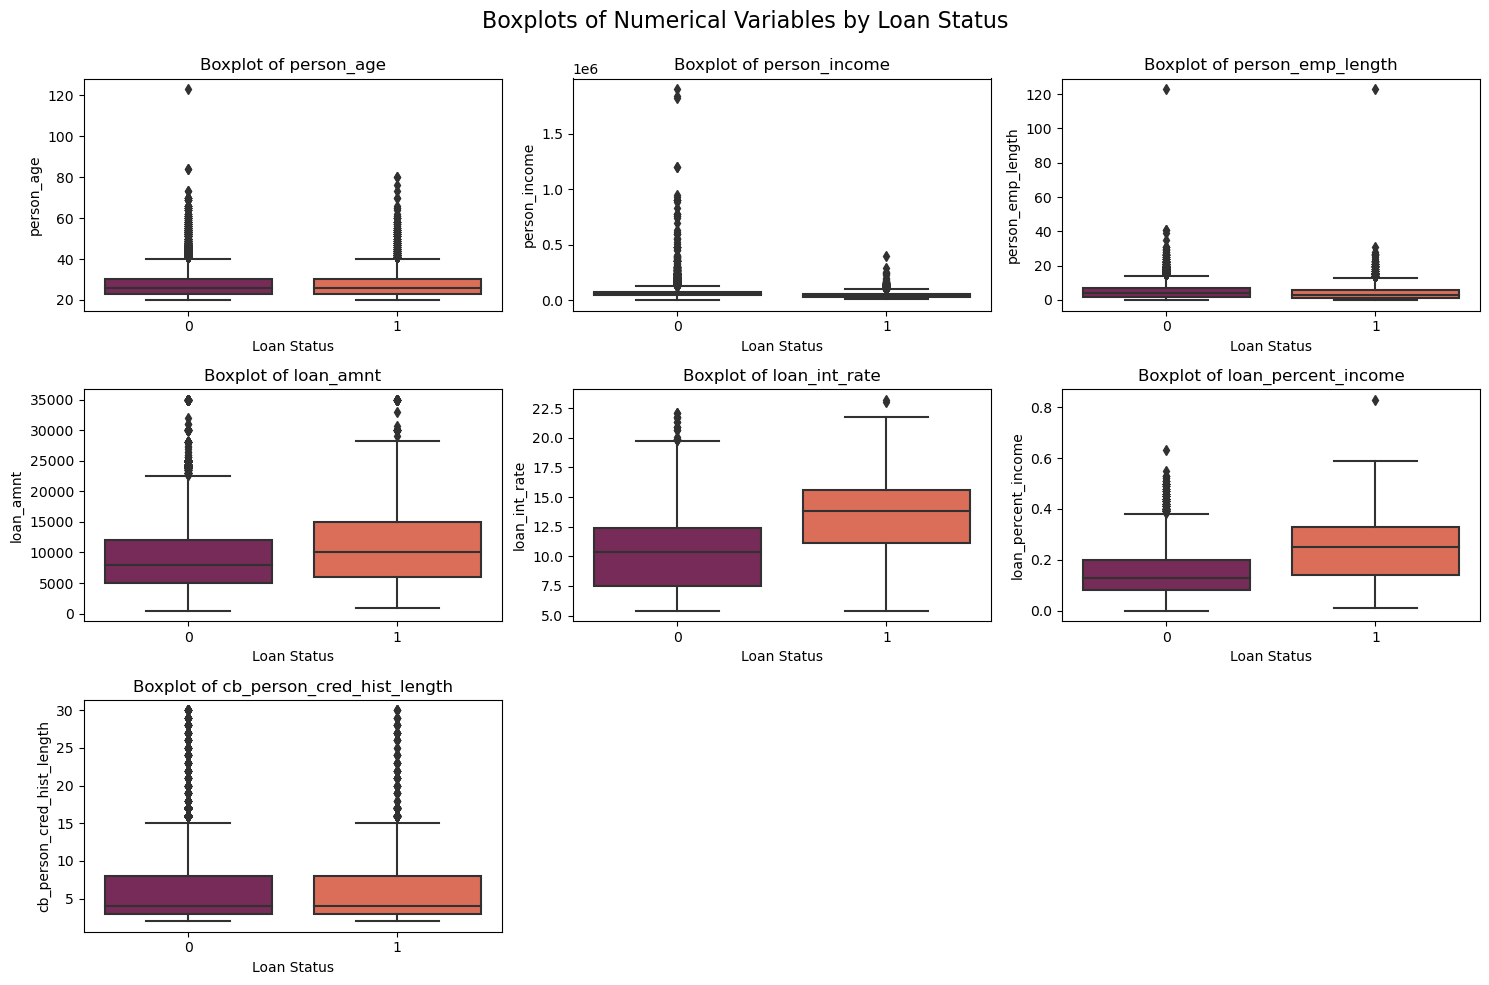

In [181]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
fig.suptitle('Boxplots of Numerical Variables by Loan Status', fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9, bottom=0.8, left=0.8, right=0.9)

palette = sns.color_palette("rocket", 2)  

for idx, col in enumerate(num_cols):
    row = idx // 3
    col_idx = idx % 3
    
    sns.boxplot(x='loan_status', y=col, data=train, palette=palette, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_xlabel('Loan Status')
    axes[row, col_idx].set_ylabel(col)

for i in range(len(num_cols), 9):  
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


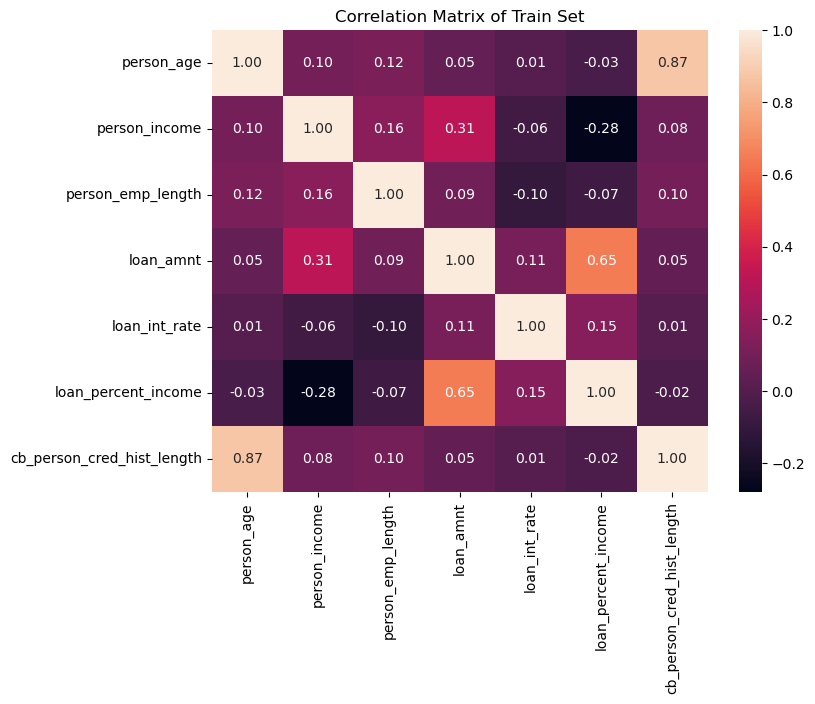

In [140]:
corr_matrix = train[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation Matrix of Train Set')
plt.show()

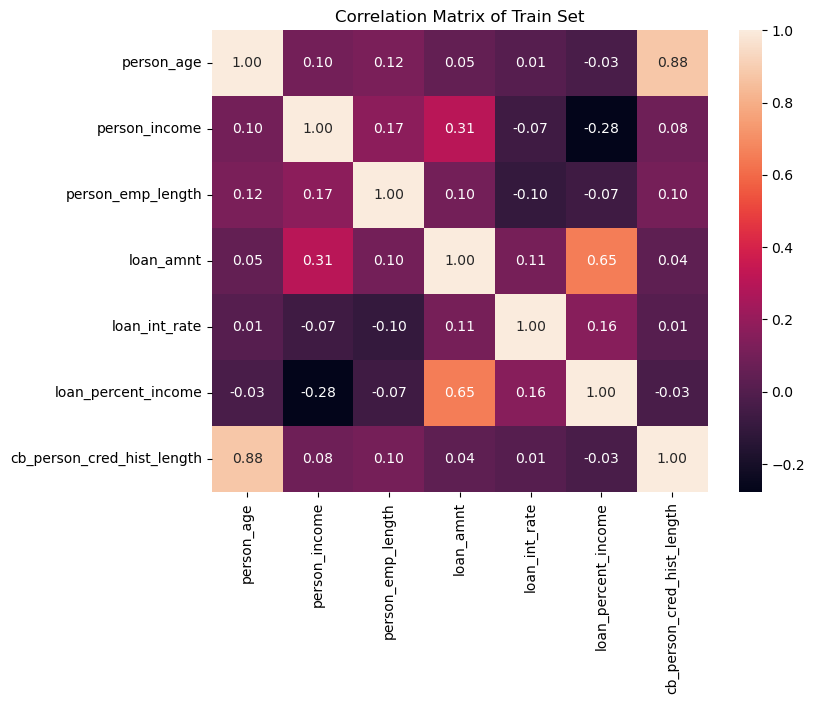

In [141]:
corr_matrix = test[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation Matrix of Train Set')
plt.show()

In [65]:
train['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

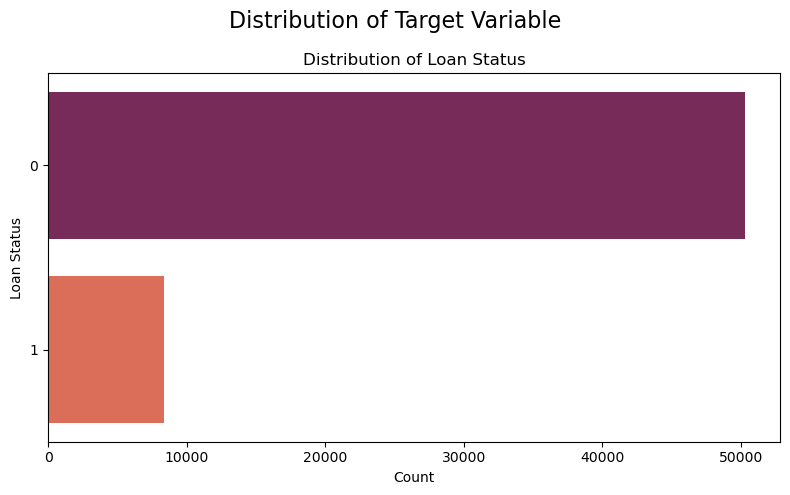

In [130]:
fig, axes = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribution of Target Variable', fontsize=16)


sns.countplot(data=train, y='loan_status', palette='rocket')
axes.set_title('Distribution of Loan Status')
axes.set_xlabel('Count')
axes.set_ylabel('Loan Status')

plt.tight_layout()
plt.show()

In [66]:
X = train.drop(columns=['loan_status'])
y = train['loan_status']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers = [
    ('tnf1', StandardScaler(), num_cols),
    ('tnf2', OneHotEncoder(sparse_output=False, drop='first', dtype=int), cat_cols),
], remainder = 'passthrough')

In [69]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [70]:
X_train_transformed.shape

(46916, 22)

In [71]:
X_test_transformed.shape

(11729, 22)

In [72]:
Xf = test.iloc[:, :]

In [73]:
Xf_transformed = transformer.transform(Xf)

In [74]:
Xf_transformed.shape

(39098, 22)

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [76]:
# Linear models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

# Tree-based models
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()

# Other models
knr = KNeighborsRegressor()
svr = SVR()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()
cbr = CatBoostRegressor()

In [77]:
regs = {
    'LR': lr,  # Linear Regression
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elastic,
    'DT': dtr,  # Decision Tree Regressor
    'RF': rfr,  # Random Forest Regressor
    'GB': gbr,  # Gradient Boosting Regressor
    'AdaBoost': abr,  # AdaBoost Regressor
    'ET': etr,  # Extra Trees Regressor
    'KNN': knr,  # K-Nearest Neighbors Regressor
    'SVR': svr, # Support Vector Regressor
    'XGB': xgbr,  # XGBoost Regressor
    'LGBM': lgbmr,  # LightGBM Regressor
    'CatBoost': cbr  # CatBoost Regressor
}

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
def train_regressor(reg, X_train, y_train, X_test, y_test):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    return roc_auc

In [81]:
roc_auc_scores = []
for name,reg in regs.items():
    current_roc_auc = train_regressor(reg, X_train_transformed, y_train, X_test_transformed, y_test)
    print("Name: ", name)
    print("ROC AOC Score: ", current_roc_auc)
    roc_auc_scores.append(current_roc_auc)

Name:  LR
ROC AOC Score:  0.8930195846681978
Name:  Ridge
ROC AOC Score:  0.8932321688037581
Name:  Lasso
ROC AOC Score:  0.5
Name:  ElasticNet
ROC AOC Score:  0.5
Name:  DT
ROC AOC Score:  0.8303343735324843
Name:  RF
ROC AOC Score:  0.940243994181196
Name:  GB
ROC AOC Score:  0.9422358610418228
Name:  AdaBoost
ROC AOC Score:  0.8595696430095924
Name:  ET
ROC AOC Score:  0.9283785270340486
Name:  KNN
ROC AOC Score:  0.8821453114300228
Name:  SVR
ROC AOC Score:  0.897478538420975
Name:  XGB
ROC AOC Score:  0.9461945386948408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 22
[LightGBM] [Info] Start training from score 0.142979
Name:  LGBM
ROC AOC Score:  0.9548225505097129
Learning rate set to 0.075205
0:	learn: 0.3360715	total: 169ms	remaining: 2m 48s


146:	learn: 0.2061867	total: 2.39s	remaining: 13.9s
147:	learn: 0.2061391	total: 2.4s	remaining: 13.8s
148:	learn: 0.2060351	total: 2.41s	remaining: 13.8s
149:	learn: 0.2059298	total: 2.42s	remaining: 13.7s
150:	learn: 0.2057979	total: 2.43s	remaining: 13.7s
151:	learn: 0.2057051	total: 2.45s	remaining: 13.7s
152:	learn: 0.2056605	total: 2.46s	remaining: 13.6s
153:	learn: 0.2055929	total: 2.47s	remaining: 13.6s
154:	learn: 0.2054747	total: 2.48s	remaining: 13.5s
155:	learn: 0.2054537	total: 2.49s	remaining: 13.5s
156:	learn: 0.2054392	total: 2.5s	remaining: 13.4s
157:	learn: 0.2053881	total: 2.51s	remaining: 13.4s
158:	learn: 0.2053569	total: 2.52s	remaining: 13.3s
159:	learn: 0.2052885	total: 2.53s	remaining: 13.3s
160:	learn: 0.2051818	total: 2.54s	remaining: 13.2s
161:	learn: 0.2051631	total: 2.55s	remaining: 13.2s
162:	learn: 0.2051152	total: 2.56s	remaining: 13.1s
163:	learn: 0.2049490	total: 2.57s	remaining: 13.1s
164:	learn: 0.2048908	total: 2.58s	remaining: 13.1s
165:	learn: 0.

313:	learn: 0.1972702	total: 4.48s	remaining: 9.79s
314:	learn: 0.1972203	total: 4.5s	remaining: 9.78s
315:	learn: 0.1971806	total: 4.51s	remaining: 9.77s
316:	learn: 0.1971599	total: 4.53s	remaining: 9.75s
317:	learn: 0.1971358	total: 4.54s	remaining: 9.73s
318:	learn: 0.1970962	total: 4.56s	remaining: 9.73s
319:	learn: 0.1970351	total: 4.58s	remaining: 9.73s
320:	learn: 0.1970151	total: 4.6s	remaining: 9.72s
321:	learn: 0.1969655	total: 4.61s	remaining: 9.7s
322:	learn: 0.1969117	total: 4.62s	remaining: 9.68s
323:	learn: 0.1968851	total: 4.63s	remaining: 9.66s
324:	learn: 0.1968547	total: 4.64s	remaining: 9.65s
325:	learn: 0.1968458	total: 4.66s	remaining: 9.63s
326:	learn: 0.1968311	total: 4.67s	remaining: 9.61s
327:	learn: 0.1967984	total: 4.68s	remaining: 9.59s
328:	learn: 0.1967645	total: 4.7s	remaining: 9.59s
329:	learn: 0.1967332	total: 4.71s	remaining: 9.57s
330:	learn: 0.1966737	total: 4.73s	remaining: 9.57s
331:	learn: 0.1966399	total: 4.75s	remaining: 9.55s
332:	learn: 0.19

473:	learn: 0.1932197	total: 6.56s	remaining: 7.28s
474:	learn: 0.1931825	total: 6.57s	remaining: 7.26s
475:	learn: 0.1931593	total: 6.59s	remaining: 7.25s
476:	learn: 0.1931486	total: 6.6s	remaining: 7.24s
477:	learn: 0.1930988	total: 6.62s	remaining: 7.22s
478:	learn: 0.1930837	total: 6.63s	remaining: 7.21s
479:	learn: 0.1930459	total: 6.64s	remaining: 7.2s
480:	learn: 0.1929999	total: 6.66s	remaining: 7.18s
481:	learn: 0.1929639	total: 6.67s	remaining: 7.17s
482:	learn: 0.1929303	total: 6.68s	remaining: 7.16s
483:	learn: 0.1928856	total: 6.7s	remaining: 7.14s
484:	learn: 0.1928703	total: 6.71s	remaining: 7.13s
485:	learn: 0.1928461	total: 6.72s	remaining: 7.11s
486:	learn: 0.1928198	total: 6.74s	remaining: 7.1s
487:	learn: 0.1927994	total: 6.76s	remaining: 7.09s
488:	learn: 0.1927624	total: 6.78s	remaining: 7.08s
489:	learn: 0.1927389	total: 6.79s	remaining: 7.07s
490:	learn: 0.1927182	total: 6.81s	remaining: 7.06s
491:	learn: 0.1926782	total: 6.82s	remaining: 7.04s
492:	learn: 0.19

635:	learn: 0.1890653	total: 8.47s	remaining: 4.85s
636:	learn: 0.1890277	total: 8.48s	remaining: 4.83s
637:	learn: 0.1890023	total: 8.5s	remaining: 4.82s
638:	learn: 0.1889769	total: 8.51s	remaining: 4.8s
639:	learn: 0.1889607	total: 8.52s	remaining: 4.79s
640:	learn: 0.1889405	total: 8.53s	remaining: 4.78s
641:	learn: 0.1889220	total: 8.54s	remaining: 4.76s
642:	learn: 0.1889086	total: 8.55s	remaining: 4.75s
643:	learn: 0.1889023	total: 8.56s	remaining: 4.73s
644:	learn: 0.1888830	total: 8.57s	remaining: 4.72s
645:	learn: 0.1888579	total: 8.58s	remaining: 4.7s
646:	learn: 0.1888297	total: 8.59s	remaining: 4.69s
647:	learn: 0.1888115	total: 8.6s	remaining: 4.67s
648:	learn: 0.1887776	total: 8.61s	remaining: 4.66s
649:	learn: 0.1887440	total: 8.63s	remaining: 4.64s
650:	learn: 0.1887284	total: 8.64s	remaining: 4.63s
651:	learn: 0.1887146	total: 8.65s	remaining: 4.61s
652:	learn: 0.1886996	total: 8.66s	remaining: 4.6s
653:	learn: 0.1886788	total: 8.67s	remaining: 4.59s
654:	learn: 0.188

810:	learn: 0.1853992	total: 10.8s	remaining: 2.51s
811:	learn: 0.1853781	total: 10.8s	remaining: 2.5s
812:	learn: 0.1853453	total: 10.8s	remaining: 2.49s
813:	learn: 0.1853267	total: 10.8s	remaining: 2.47s
814:	learn: 0.1853059	total: 10.8s	remaining: 2.46s
815:	learn: 0.1852890	total: 10.8s	remaining: 2.45s
816:	learn: 0.1852691	total: 10.9s	remaining: 2.43s
817:	learn: 0.1852362	total: 10.9s	remaining: 2.42s
818:	learn: 0.1852206	total: 10.9s	remaining: 2.4s
819:	learn: 0.1851993	total: 10.9s	remaining: 2.39s
820:	learn: 0.1851689	total: 10.9s	remaining: 2.38s
821:	learn: 0.1851415	total: 10.9s	remaining: 2.36s
822:	learn: 0.1851233	total: 10.9s	remaining: 2.35s
823:	learn: 0.1851066	total: 10.9s	remaining: 2.33s
824:	learn: 0.1850727	total: 10.9s	remaining: 2.32s
825:	learn: 0.1850593	total: 10.9s	remaining: 2.31s
826:	learn: 0.1850417	total: 11s	remaining: 2.29s
827:	learn: 0.1850295	total: 11s	remaining: 2.28s
828:	learn: 0.1850152	total: 11s	remaining: 2.26s
829:	learn: 0.184990

972:	learn: 0.1822482	total: 13.1s	remaining: 365ms
973:	learn: 0.1822205	total: 13.2s	remaining: 351ms
974:	learn: 0.1822062	total: 13.2s	remaining: 338ms
975:	learn: 0.1821885	total: 13.2s	remaining: 324ms
976:	learn: 0.1821811	total: 13.2s	remaining: 310ms
977:	learn: 0.1821609	total: 13.2s	remaining: 297ms
978:	learn: 0.1821487	total: 13.2s	remaining: 283ms
979:	learn: 0.1821382	total: 13.2s	remaining: 270ms
980:	learn: 0.1821247	total: 13.2s	remaining: 256ms
981:	learn: 0.1821138	total: 13.2s	remaining: 243ms
982:	learn: 0.1820859	total: 13.2s	remaining: 229ms
983:	learn: 0.1820836	total: 13.3s	remaining: 216ms
984:	learn: 0.1820668	total: 13.3s	remaining: 202ms
985:	learn: 0.1820330	total: 13.3s	remaining: 189ms
986:	learn: 0.1820101	total: 13.3s	remaining: 175ms
987:	learn: 0.1819873	total: 13.3s	remaining: 162ms
988:	learn: 0.1819547	total: 13.3s	remaining: 148ms
989:	learn: 0.1819526	total: 13.3s	remaining: 135ms
990:	learn: 0.1819333	total: 13.3s	remaining: 121ms
991:	learn: 

In [85]:
performance_df = pd.DataFrame({'Algorithm':regs.keys(),'ROC AUC': roc_auc_scores}).sort_values('ROC AUC', ascending=False)

In [86]:
performance_df

,Algorithm,ROC AUC
13,CatBoost,0.955695
12,LGBM,0.954823
11,XGB,0.946195
6,GB,0.942236
5,RF,0.940244
8,ET,0.928379
10,SVR,0.897479
1,Ridge,0.893232
0,LR,0.893020
9,KNN,0.882145


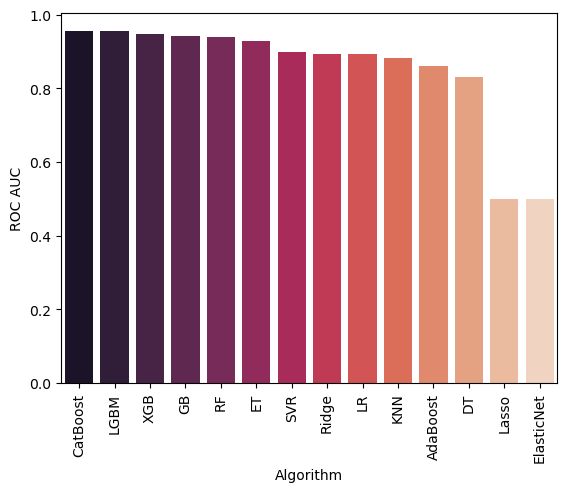

In [120]:
sns.barplot(x = performance_df['Algorithm'], y = performance_df['ROC AUC'], palette='rocket')
plt.xticks(rotation = 'vertical')
plt.show()

In [88]:
clf = cbr

In [89]:
clf.fit(X_train_transformed,y_train)

Learning rate set to 0.075205
0:	learn: 0.3360715	total: 16.2ms	remaining: 16.2s
1:	learn: 0.3238866	total: 32.2ms	remaining: 16.1s
2:	learn: 0.3123536	total: 49.2ms	remaining: 16.3s
3:	learn: 0.3022417	total: 64.7ms	remaining: 16.1s
4:	learn: 0.2931373	total: 79.6ms	remaining: 15.8s
5:	learn: 0.2851446	total: 105ms	remaining: 17.3s
6:	learn: 0.2781870	total: 121ms	remaining: 17.2s
7:	learn: 0.2723201	total: 133ms	remaining: 16.4s
8:	learn: 0.2667548	total: 143ms	remaining: 15.7s
9:	learn: 0.2617093	total: 153ms	remaining: 15.1s
10:	learn: 0.2572686	total: 163ms	remaining: 14.7s
11:	learn: 0.2534604	total: 173ms	remaining: 14.3s
12:	learn: 0.2501054	total: 183ms	remaining: 13.9s
13:	learn: 0.2471425	total: 198ms	remaining: 14s
14:	learn: 0.2445114	total: 221ms	remaining: 14.5s
15:	learn: 0.2421500	total: 235ms	remaining: 14.5s
16:	learn: 0.2401966	total: 248ms	remaining: 14.3s
17:	learn: 0.2382397	total: 258ms	remaining: 14.1s
18:	learn: 0.2364779	total: 269ms	remaining: 13.9s
19:	lear

174:	learn: 0.2040679	total: 2.1s	remaining: 9.89s
175:	learn: 0.2039631	total: 2.15s	remaining: 10s
176:	learn: 0.2039027	total: 2.16s	remaining: 10s
177:	learn: 0.2038632	total: 2.17s	remaining: 10s
178:	learn: 0.2037972	total: 2.19s	remaining: 10s
179:	learn: 0.2037062	total: 2.2s	remaining: 10s
180:	learn: 0.2035771	total: 2.21s	remaining: 10s
181:	learn: 0.2035248	total: 2.23s	remaining: 10s
182:	learn: 0.2034381	total: 2.25s	remaining: 10s
183:	learn: 0.2033972	total: 2.26s	remaining: 10s
184:	learn: 0.2032738	total: 2.27s	remaining: 10s
185:	learn: 0.2032146	total: 2.29s	remaining: 10s
186:	learn: 0.2031682	total: 2.3s	remaining: 10s
187:	learn: 0.2030636	total: 2.33s	remaining: 10.1s
188:	learn: 0.2030053	total: 2.35s	remaining: 10.1s
189:	learn: 0.2029851	total: 2.36s	remaining: 10.1s
190:	learn: 0.2029457	total: 2.38s	remaining: 10.1s
191:	learn: 0.2028995	total: 2.4s	remaining: 10.1s
192:	learn: 0.2028459	total: 2.42s	remaining: 10.1s
193:	learn: 0.2028099	total: 2.44s	remai

338:	learn: 0.1963571	total: 4.24s	remaining: 8.27s
339:	learn: 0.1963126	total: 4.25s	remaining: 8.26s
340:	learn: 0.1962945	total: 4.27s	remaining: 8.25s
341:	learn: 0.1962685	total: 4.28s	remaining: 8.24s
342:	learn: 0.1962513	total: 4.31s	remaining: 8.25s
343:	learn: 0.1962275	total: 4.33s	remaining: 8.26s
344:	learn: 0.1962224	total: 4.36s	remaining: 8.28s
345:	learn: 0.1962174	total: 4.39s	remaining: 8.29s
346:	learn: 0.1961836	total: 4.42s	remaining: 8.32s
347:	learn: 0.1961617	total: 4.45s	remaining: 8.34s
348:	learn: 0.1961268	total: 4.47s	remaining: 8.33s
349:	learn: 0.1961221	total: 4.49s	remaining: 8.34s
350:	learn: 0.1960958	total: 4.51s	remaining: 8.34s
351:	learn: 0.1960805	total: 4.52s	remaining: 8.32s
352:	learn: 0.1960603	total: 4.53s	remaining: 8.31s
353:	learn: 0.1960378	total: 4.54s	remaining: 8.29s
354:	learn: 0.1959906	total: 4.55s	remaining: 8.27s
355:	learn: 0.1959795	total: 4.57s	remaining: 8.26s
356:	learn: 0.1959303	total: 4.58s	remaining: 8.25s
357:	learn: 

505:	learn: 0.1923526	total: 6.32s	remaining: 6.17s
506:	learn: 0.1923244	total: 6.33s	remaining: 6.16s
507:	learn: 0.1922944	total: 6.35s	remaining: 6.15s
508:	learn: 0.1922661	total: 6.36s	remaining: 6.14s
509:	learn: 0.1922583	total: 6.37s	remaining: 6.12s
510:	learn: 0.1922370	total: 6.38s	remaining: 6.11s
511:	learn: 0.1922285	total: 6.39s	remaining: 6.09s
512:	learn: 0.1922074	total: 6.4s	remaining: 6.08s
513:	learn: 0.1921848	total: 6.42s	remaining: 6.07s
514:	learn: 0.1921671	total: 6.43s	remaining: 6.05s
515:	learn: 0.1921482	total: 6.44s	remaining: 6.04s
516:	learn: 0.1921098	total: 6.45s	remaining: 6.03s
517:	learn: 0.1920833	total: 6.46s	remaining: 6.01s
518:	learn: 0.1920531	total: 6.47s	remaining: 6s
519:	learn: 0.1920343	total: 6.49s	remaining: 5.99s
520:	learn: 0.1920165	total: 6.5s	remaining: 5.97s
521:	learn: 0.1919935	total: 6.51s	remaining: 5.96s
522:	learn: 0.1919752	total: 6.52s	remaining: 5.95s
523:	learn: 0.1919631	total: 6.53s	remaining: 5.93s
524:	learn: 0.191

669:	learn: 0.1882582	total: 8.26s	remaining: 4.07s
670:	learn: 0.1882288	total: 8.27s	remaining: 4.05s
671:	learn: 0.1882084	total: 8.28s	remaining: 4.04s
672:	learn: 0.1881711	total: 8.29s	remaining: 4.03s
673:	learn: 0.1881435	total: 8.3s	remaining: 4.02s
674:	learn: 0.1881188	total: 8.31s	remaining: 4s
675:	learn: 0.1880908	total: 8.32s	remaining: 3.99s
676:	learn: 0.1880671	total: 8.33s	remaining: 3.98s
677:	learn: 0.1880296	total: 8.34s	remaining: 3.96s
678:	learn: 0.1880088	total: 8.35s	remaining: 3.95s
679:	learn: 0.1879881	total: 8.36s	remaining: 3.94s
680:	learn: 0.1879548	total: 8.37s	remaining: 3.92s
681:	learn: 0.1879387	total: 8.38s	remaining: 3.91s
682:	learn: 0.1879028	total: 8.4s	remaining: 3.9s
683:	learn: 0.1878831	total: 8.41s	remaining: 3.88s
684:	learn: 0.1878563	total: 8.42s	remaining: 3.87s
685:	learn: 0.1878398	total: 8.43s	remaining: 3.86s
686:	learn: 0.1878214	total: 8.43s	remaining: 3.84s
687:	learn: 0.1877813	total: 8.45s	remaining: 3.83s
688:	learn: 0.1877

837:	learn: 0.1848135	total: 10.1s	remaining: 1.96s
838:	learn: 0.1847939	total: 10.1s	remaining: 1.95s
839:	learn: 0.1847677	total: 10.2s	remaining: 1.94s
840:	learn: 0.1847453	total: 10.2s	remaining: 1.92s
841:	learn: 0.1847317	total: 10.2s	remaining: 1.91s
842:	learn: 0.1847246	total: 10.2s	remaining: 1.9s
843:	learn: 0.1846996	total: 10.2s	remaining: 1.89s
844:	learn: 0.1846965	total: 10.2s	remaining: 1.88s
845:	learn: 0.1846847	total: 10.2s	remaining: 1.86s
846:	learn: 0.1846712	total: 10.3s	remaining: 1.85s
847:	learn: 0.1846564	total: 10.3s	remaining: 1.84s
848:	learn: 0.1846467	total: 10.3s	remaining: 1.83s
849:	learn: 0.1846405	total: 10.3s	remaining: 1.82s
850:	learn: 0.1846224	total: 10.3s	remaining: 1.8s
851:	learn: 0.1846062	total: 10.3s	remaining: 1.79s
852:	learn: 0.1845981	total: 10.3s	remaining: 1.78s
853:	learn: 0.1845797	total: 10.4s	remaining: 1.77s
854:	learn: 0.1845653	total: 10.4s	remaining: 1.76s
855:	learn: 0.1845495	total: 10.4s	remaining: 1.75s
856:	learn: 0.

In [90]:
y_pred = clf.predict(X_test_transformed)

In [91]:
y_pred.shape

(11729,)

In [92]:
roc_auc_score(y_test, y_pred)

0.9556945922484132

In [93]:
yf = clf.predict(Xf_transformed)

In [94]:
yf.shape

(39098,)

In [95]:
submission = pd.DataFrame()

In [96]:
submission['id'] = id
submission['loan_status'] = yf

In [97]:
submission.sample(5)

,id,loan_status
24680,83325,0.104493
32213,90858,0.018143
34408,93053,0.115793
18254,76899,0.234804
29149,87794,0.857730


In [98]:
submission.to_csv('submission.csv', index=False)